# E-Commerce Data Analysis Project

## Analysis Goal

*Goal:*  
Analyze raw e-commerce transaction data to uncover sales trends, customer behavior, and product performance.  
Identify key patterns and insights that could help a business increase revenue, optimize product offerings, and understand customer segments.

*Objectives:*  
1. *Data Cleaning:* Remove duplicates, correct country names, handle missing CustomerIDs, and clean messy text in product descriptions.  
2. *Feature Creation:* Calculate TotalPrice = Quantity × UnitPrice, extract Month/Year from InvoiceDate, create customer segments.  
3. *Exploratory Data Analysis (EDA):* Top-selling products by quantity/revenue, total sales by country, monthly/weekly trends, outliers.  
4. *Visualization:* Bar charts, line charts, pie charts for key metrics.  
5. *Insights & Recommendations:* Highlight profitable products/customers, suggest growth opportunities.

*Metric / Success Indicator:*  
Ability to clean, organize, analyze, and visualize raw data to derive actionable business insights. Clear charts showing trends in sales, products, and customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") 
%matplotlib inline

In [14]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Data_Analysis'

In [37]:
df = pd.read_csv("C:/Users/User/Desktop/Data_Analysis/data.csv", encoding= 'ISO-8859-1')

In [48]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [41]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Data Cleaning

In [49]:
# 1. Remove duplicates
df.drop_duplicates(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [50]:
# 2. Handling missing values
df['CustomerID'] = df['CustomerID'].fillna('Unknown')
df['Description'] = df['Description'].fillna('Unknown Product')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


In [52]:
df['Country'] = df['Country'].str.strip().str.title()

In [65]:
# Handling data types
# convert invoicedate to date time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# removing negative quantities(to generate revenue)
df = df[df['Quantity'] > 0]

### Feature Creation

In [66]:
# Add totalprice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [69]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 526054 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526054 non-null  object        
 1   StockCode    526054 non-null  object        
 2   Description  526054 non-null  object        
 3   Quantity     526054 non-null  int64         
 4   InvoiceDate  526054 non-null  datetime64[ns]
 5   UnitPrice    526054 non-null  float64       
 6   CustomerID   526054 non-null  object        
 7   Country      526054 non-null  object        
 8   TotalPrice   526054 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [71]:
# Extract month and year
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [72]:
# Simple Customer Segmentation
df['HighValueCustomer'] = np.where(df['TotalPrice'] > 1000, 'Yes', 'No')

In [73]:
df.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,HighValueCustomer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,No
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,No
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12,2010,No
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,2010,No
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2010,No
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2010,No
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12,2010,No


In [79]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice,Month,Year
count,526054.000000,526054,526054.000000,526054.000000,526054.000000,526054.000000
mean,10.730874,2011-07-04 13:30:39.720940800,3.871747,20.188016,7.551879,2010.921696
min,1.000000,2010-12-01 08:26:00,-11062.060000,-11062.060000,1.000000,2010.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,3.900000,5.000000,2011.000000
50%,4.000000,2011-07-20 01:02:30,2.080000,9.920000,8.000000,2011.000000
75%,11.000000,2011-10-19 11:13:00,4.130000,17.700000,11.000000,2011.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,168469.600000,12.000000,2011.000000
std,157.591838,NaN,42.016560,272.250300,3.508391,0.268649


### Exploratory Data Analysis(EDA)

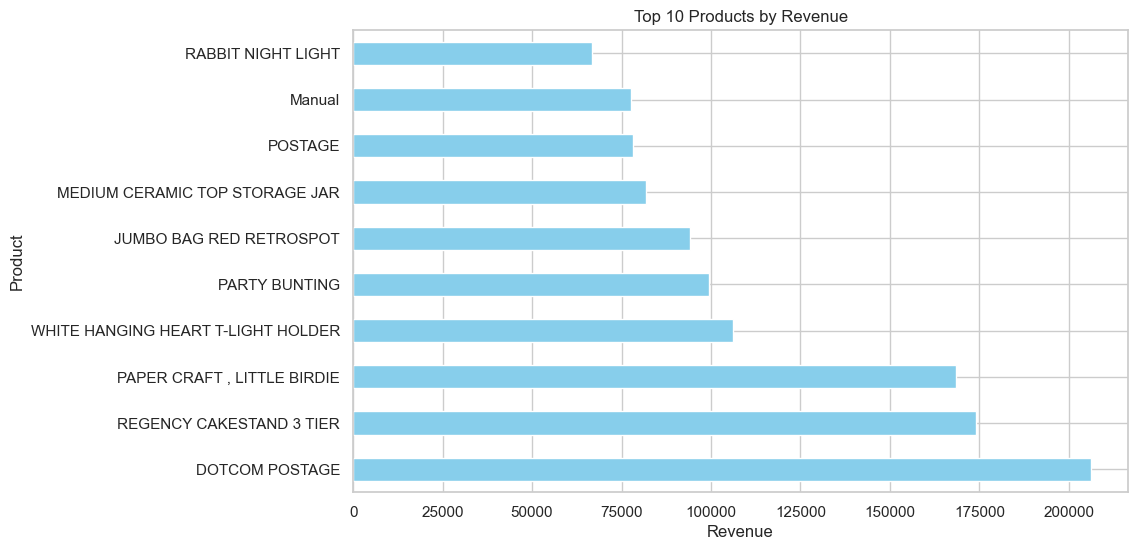

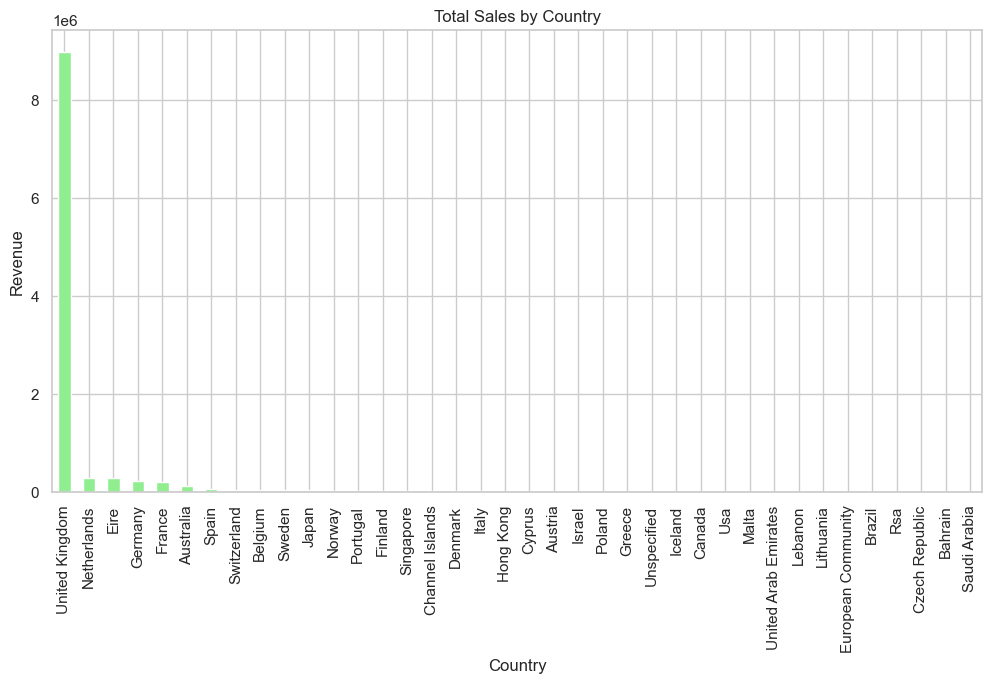

In [74]:
# Top 10 products by revenue
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

# Sales by Country
sales_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
sales_country.plot(kind='bar', figsize=(12,6), color='lightgreen')
plt.title("Total Sales by Country")
plt.ylabel("Revenue")
plt.show()

### Monthly Sales Trend

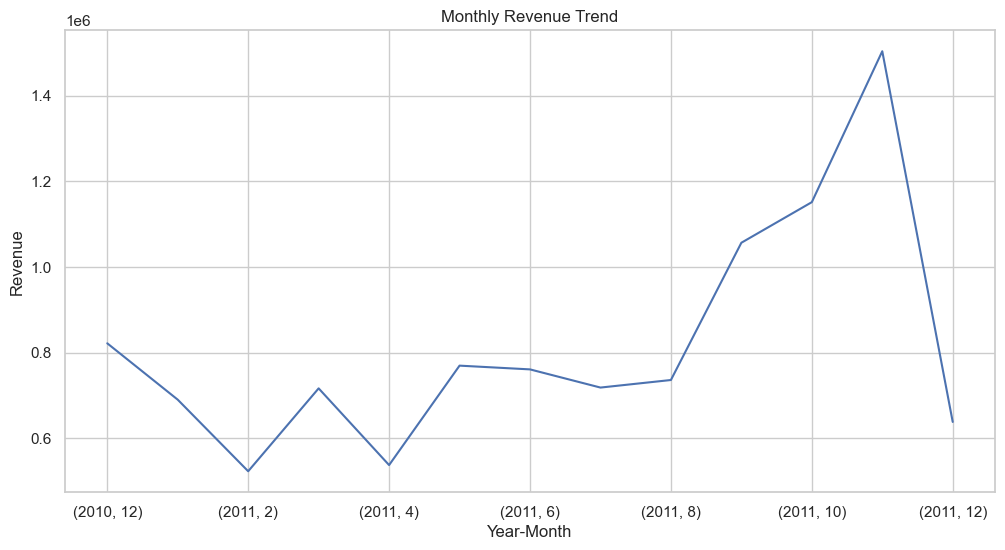

In [75]:
monthly_sales = df.groupby(['Year','Month'])['TotalPrice'].sum()
monthly_sales.plot(kind='line', figsize=(12,6))
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Year-Month")
plt.show()

### Insights

### Profitable Products

Based on our top 10 products by revenue on the bar chart:
> They should be prioritized in stock management, marketing campaigns, and promotions.
>  Consider bundling these products with lower-performing items to increase overall sales.

Observation: Often, products with moderate quantity but high unit price may outperform high-volume, low price items in revenue.

### Customer Segments

High-Value customers: I tagged customers spending > 1000 as high value.
> These customers are critical for repeat business. Retaining them via loyalty programs, special offers, or early access to new products is strategic.

Observation: If a small percentage of customers are generating most revenue, your business can focus on nurturing this group rather than trying to please all equally.

### Recommendations:

- Keep more stock of top-selling products & reduce stock of slow-moving items to free capital.
- Create a VIP loyal program for high-value customers. Send personalized offers or discounts to encourage repeat purchases.
- Promote top-selling products on homepage and social media ads.
- Focus campaigns on top countries for maximum ROI.
- Consider local ads, payment methods, or shipping deals for underperforming regions.

### Growth Opportunities

- Cross-selling: Offer complementary roducts during checkout.
- Upselling: Suggest premium versions of popular products.
- New Product Launches: Base decisions on patterns from top-selling categories.
- Seasonal Campaigns: Align promotions with monthly revenue peaks for maximum effect.

In [81]:
df.to_csv("C:/Users/User/Desktop/Data_Analysis/ecommerce_cleaned.csv", index=False, encoding= 'utf-8')